# Two Sigma Stock Market Prediction 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import datetime

import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
market_data=pd.read_csv('marketdata.csv')

In [3]:
market_data.shape

(4072956, 17)

In [4]:
market_data.head(7)

,Unnamed: 0,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0
3,3,2007-02-01 22:00:00+00:00,AAPL.O,Apple Inc,23747329.0,84.74,86.23,-0.011548,0.016324,NaN,NaN,-0.048613,-0.037182,NaN,NaN,-0.007425,1.0
4,4,2007-02-01 22:00:00+00:00,ABB.N,ABB Ltd,1208600.0,18.02,18.01,0.011791,0.025043,NaN,NaN,0.012929,0.020397,NaN,NaN,-0.017994,1.0
5,5,2007-02-01 22:00:00+00:00,ABC.N,AmerisourceBergen Corp,1657300.0,52.37,52.40,-0.000191,0.008468,NaN,NaN,0.089000,0.077746,NaN,NaN,0.058680,1.0
6,6,2007-02-01 22:00:00+00:00,ABD.N,ACCO Brands Corp,1186200.0,23.63,24.13,-0.020721,-0.007404,NaN,NaN,0.005104,0.026809,NaN,NaN,-0.044285,0.0


In [5]:
market_data=market_data.iloc[:,1:]

In [6]:
market_data.head(3)

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
0,2007-02-01 22:00:00+00:00,A.N,Agilent Technologies Inc,2606900.0,32.19,32.17,0.005938,0.005312,NaN,NaN,-0.001860,0.000622,NaN,NaN,0.034672,1.0
1,2007-02-01 22:00:00+00:00,AAI.N,AirTran Holdings Inc,2051600.0,11.12,11.08,0.004517,-0.007168,NaN,NaN,-0.078708,-0.088066,NaN,NaN,0.027803,0.0
2,2007-02-01 22:00:00+00:00,AAP.N,Advance Auto Parts Inc,1164800.0,37.51,37.99,-0.011594,0.025648,NaN,NaN,0.014332,0.045405,NaN,NaN,0.024433,1.0


In [7]:
market_data.isnull().sum()

time                            0
assetCode                       0
assetName                       0
volume                          0
close                           0
open                            0
returnsClosePrevRaw1            0
returnsOpenPrevRaw1             0
returnsClosePrevMktres1     15980
returnsOpenPrevMktres1      15988
returnsClosePrevRaw10           0
returnsOpenPrevRaw10            0
returnsClosePrevMktres10    93010
returnsOpenPrevMktres10     93054
returnsOpenNextMktres10         0
universe                        0
dtype: int64

In [8]:
market_data.nunique()

time                           2498
assetCode                      3780
assetName                      3511
volume                      2392152
close                         55434
open                          46627
returnsClosePrevRaw1        2903234
returnsOpenPrevRaw1         2866950
returnsClosePrevMktres1     4056917
returnsOpenPrevMktres1      4056910
returnsClosePrevRaw10       3416981
returnsOpenPrevRaw10        3380334
returnsClosePrevMktres10    3979921
returnsOpenPrevMktres10     3979902
returnsOpenNextMktres10     4072956
universe                          2
dtype: int64

In [9]:
market_data.tail(3)

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
4072953,2016-12-30 22:00:00+00:00,ZNGA.O,Zynga Inc,7396601.0,2.57,2.58,-0.011538,0.000000,-0.006004,-0.001034,-0.091873,-0.078571,-0.077252,-0.077188,0.011703,0.0
4072954,2016-12-30 22:00:00+00:00,ZTO.N,Unknown,3146519.0,12.07,12.50,-0.029743,0.007252,-0.028460,0.006719,-0.065066,-0.042146,-0.078104,-0.043813,0.083367,1.0
4072955,2016-12-30 22:00:00+00:00,ZTS.N,Zoetis Inc,1701204.0,53.53,53.64,-0.001678,0.003091,0.005060,0.002885,0.023127,0.028177,0.026566,0.028719,-0.016220,1.0


In [10]:
initial=market_data.memory_usage()

In [11]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072956 entries, 0 to 4072955
Data columns (total 16 columns):
time                        object
assetCode                   object
assetName                   object
volume                      float64
close                       float64
open                        float64
returnsClosePrevRaw1        float64
returnsOpenPrevRaw1         float64
returnsClosePrevMktres1     float64
returnsOpenPrevMktres1      float64
returnsClosePrevRaw10       float64
returnsOpenPrevRaw10        float64
returnsClosePrevMktres10    float64
returnsOpenPrevMktres10     float64
returnsOpenNextMktres10     float64
universe                    float64
dtypes: float64(13), object(3)
memory usage: 497.2+ MB


### Let's change the datatype of variables to make them more functionable and reduce the memory usage.

In [12]:
market_data.open.dtype=='float64'

True

In [10]:
for columnname in market_data.columns:
    if market_data[columnname].dtype=='float64':
        market_data[columnname]=market_data[columnname].astype('float32')

In [11]:
market_data['time'] =  pd.to_datetime(market_data['time'], format='%Y-%m-%d %H:%M:%S+00:00')

In [12]:
market_data['assetName']=market_data['assetName'].astype('category')
market_data['assetCode']=market_data['assetCode'].astype('category')
market_data['universe'] = market_data['universe'].astype('bool')
market_data.time=market_data.time.dt.date

In [16]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4072956 entries, 0 to 4072955
Data columns (total 16 columns):
time                        object
assetCode                   category
assetName                   category
volume                      float32
close                       float32
open                        float32
returnsClosePrevRaw1        float32
returnsOpenPrevRaw1         float32
returnsClosePrevMktres1     float32
returnsOpenPrevMktres1      float32
returnsClosePrevRaw10       float32
returnsOpenPrevRaw10        float32
returnsClosePrevMktres10    float32
returnsOpenPrevMktres10     float32
returnsOpenNextMktres10     float32
universe                    bool
dtypes: bool(1), category(2), float32(12), object(1)
memory usage: 237.3+ MB


In [20]:
print('Memory occupied before downcasting:',initial.sum())
print('Memory occupied after downcasting :',market_data.memory_usage().sum())
print('Total memory saved                :',round(market_data.memory_usage().sum()*100/initial.sum(), 2),'%')

Memory occupied before downcasting: 521338448
Memory occupied after downcasting : 248836404
Total memory saved                : 47.73 %


In [17]:
print('The amount of memory saved=',market_data.memory_usage().sum()*100/initial.sum())

The amount of memory saved= 47.73029976104889


Saved 250+ MB of memory!

## Exploratory data analysis

In [151]:
market_data.describe()

,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10
count,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.072956e+06,4.056976e+06,4.056968e+06,4.072956e+06,4.072956e+06,3.979946e+06,3.979902e+06,4.072956e+06
mean,2.665310e+06,3.971241e+01,3.971235e+01,5.473023e-04,9.569114e-03,1.738580e-04,9.309284e-03,5.232020e-03,1.423684e-02,1.638857e-03,1.481702e-02,1.405529e-02
std,7.687606e+06,4.228822e+01,4.261116e+01,3.697774e-02,7.084387e+00,3.270305e-02,6.968866e+00,8.872484e-02,7.123552e+00,7.517820e-02,7.285742e+00,7.242466e+00
min,0.000000e+00,7.000000e-02,1.000000e-02,-9.776464e-01,-9.998881e-01,-1.235622e+00,-6.158463e+02,-9.774034e-01,-9.998904e-01,-3.343277e+00,-1.375045e+03,-1.375045e+03
25%,4.657968e+05,1.725000e+01,1.725000e+01,-1.089241e-02,-1.108987e-02,-8.569246e-03,-1.002114e-02,-3.339148e-02,-3.337573e-02,-2.927584e-02,-2.962645e-02,-2.970509e-02
50%,9.821000e+05,3.030000e+01,3.029000e+01,3.373819e-04,3.824092e-04,-1.236127e-04,-3.356938e-06,5.160339e-03,5.165128e-03,8.329260e-04,1.126206e-03,1.044642e-03
75%,2.403165e+06,4.986000e+01,4.985000e+01,1.165695e-02,1.183612e-02,8.397528e-03,1.002712e-02,4.297606e-02,4.298507e-02,3.059022e-02,3.171535e-02,3.152750e-02
max,1.226791e+09,1.578130e+03,9.998990e+03,4.559245e+01,9.209000e+03,4.512244e+01,8.989207e+03,4.667181e+01,9.382000e+03,4.624971e+01,9.761338e+03,9.761338e+03


Target Variable

In [152]:
market_data.returnsOpenNextMktres10.describe(percentiles=[0.01, 0.99])

count    4.072956e+06
mean     1.405529e-02
std      7.242466e+00
min     -1.375045e+03
1%      -1.888052e-01
50%      1.044642e-03
99%      2.078779e-01
max      9.761338e+03
Name: returnsOpenNextMktres10, dtype: float64

C:\Users\chinn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



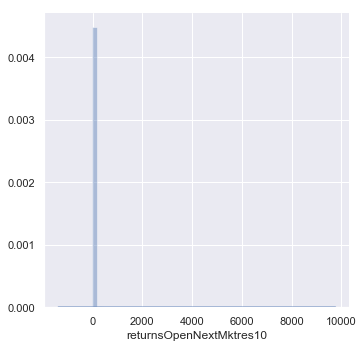

In [153]:
sns.FacetGrid(market_data, height=5) \
   .map(sns.distplot, "returnsOpenNextMktres10") \
   .add_legend();
plt.show();

In [154]:
print('The minimum value of target variable is ',market_data.returnsOpenNextMktres10.min(),'and max value is',market_data.returnsOpenNextMktres10.max())

The minimum value of target variable is  -1375.045 and max value is 9761.338


In [155]:
market_data[market_data.returnsOpenNextMktres10<=-1000]

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
277852,2007-10-31,ATPG.O,ATP Oil & Gas Corp,431705.0,57.349998,54.349998,0.051136,5434.000000,0.033208,5347.354004,0.049789,-0.020721,0.044722,-0.008626,-1375.045044,False
279315,2007-11-01,ATPG.O,ATP Oil & Gas Corp,480803.0,56.419998,57.000000,-0.016216,0.048758,0.018749,169.846085,0.034660,0.054579,0.056293,0.047723,-1036.400757,False
282237,2007-11-05,ATPG.O,ATP Oil & Gas Corp,444899.0,55.220001,54.590000,-0.018311,-0.036534,-0.011079,-38.512146,0.024870,0.044785,0.028541,0.036277,-1225.593262,False
283697,2007-11-06,ATPG.O,ATP Oil & Gas Corp,817261.0,56.139999,55.889999,0.016661,0.023814,-0.000148,-1.826470,0.039437,0.037113,0.038767,0.041530,-1226.144287,False


In [156]:
market_data[market_data.returnsOpenNextMktres10>=1000]

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
24133,2007-02-26,TEO.N,Telecom Argentina SA,90900.0,22.840000,22.600000,-0.000438,-0.013100,0.000825,-0.008187,0.029757,0.015730,0.003909,0.008387,2170.789062,False
91022,2007-05-02,PBRa.N,Petroleo Brasileiro SA Petrobras,1557742.0,90.209999,89.349998,0.006359,0.000896,-0.007562,-0.003053,-0.031978,-0.039970,-0.023168,-0.032057,9761.337891,True
164243,2007-07-13,RRR.N,RSC Holdings Inc,440000.0,21.910000,21.500000,0.012945,0.023810,0.009417,0.028716,0.089508,0.072319,NaN,NaN,1273.736328,False
205166,2007-08-22,EXH.N,Archrock Inc,996500.0,78.250000,77.000000,-0.003185,-0.030227,-0.013629,-0.031566,0.013081,-0.002164,0.066657,0.036802,7860.473145,True
274925,2007-10-29,ATPG.O,ATP Oil & Gas Corp,307933.0,56.599998,55.730000,0.022953,0.009053,0.018828,-0.002208,0.027783,0.014379,0.029591,0.016414,3207.863037,False
554191,2008-07-23,RGC.N,Regal Entertainment Group,1311640.0,16.180000,16.080000,0.011250,0.000000,0.008593,-0.014918,0.083724,0.041451,0.042770,0.035710,1736.454224,True
587369,2008-08-21,TX.N,Ternium SA,818526.0,34.599998,34.700001,0.004938,0.015808,0.002730,0.013045,0.008159,-0.034233,0.008439,-0.038720,2672.020996,True
614639,2008-09-17,ABV.N,Companhia de Bebidas das Americas Ambev,1159408.0,50.240002,53.330002,-0.078334,0.004331,-0.033347,-0.006008,-0.168212,-0.124158,-0.026640,-0.042231,2734.923828,True


In [157]:
for i in range(90,101,1):
    print('The ',i,'Th percentile is=',market_data.returnsOpenNextMktres10.quantile(i/100))

The  90 Th percentile is= 0.07094716653227806
The  91 Th percentile is= 0.07588737159967426
The  92 Th percentile is= 0.08152703344821932
The  93 Th percentile is= 0.08805996291339398
The  94 Th percentile is= 0.09590333029627798
The  95 Th percentile is= 0.1055758111178875
The  96 Th percentile is= 0.11776522397994993
The  97 Th percentile is= 0.13463359102606773
The  98 Th percentile is= 0.15970668196678162
The  99 Th percentile is= 0.20787793472409272
The  100 Th percentile is= 9761.337890625


In [158]:
for i in range(990,1001,1):
    print('The ',i/10,'Th percentile is=',market_data.returnsOpenNextMktres10.quantile(i/1000))

The  99.0 Th percentile is= 0.20787793472409272
The  99.1 Th percentile is= 0.21580771833658205
The  99.2 Th percentile is= 0.22496113300323461
The  99.3 Th percentile is= 0.23544716760516154
The  99.4 Th percentile is= 0.24807283088565074
The  99.5 Th percentile is= 0.26368587389588394
The  99.6 Th percentile is= 0.28374402821064126
The  99.7 Th percentile is= 0.3113138820230907
The  99.8 Th percentile is= 0.35328230112790016
The  99.9 Th percentile is= 0.43966944068672636
The  100.0 Th percentile is= 9761.337890625


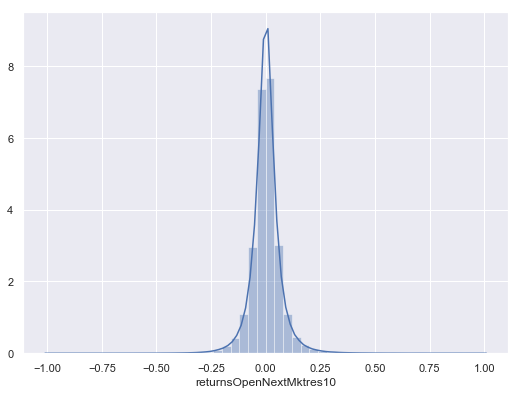

In [159]:
sns.distplot(market_data.returnsOpenNextMktres10.clip(-1,1))
plt.show()

Analyzing the stock with maximum target variable

In [160]:
data = []
for columnnames in ['close','open']:
    asset_df = market_data[(market_data['assetName'] == 'ATP Oil & Gas Corp')]
    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df[columnnames].values,
        name = columnnames
    ))
layout = go.Layout(dict(title = "Closing Vs Opening of ATP Oil & Gas Corp",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [161]:
data = []
for columnnames in ['close','open']:
    asset_df = market_data[(market_data['assetName'] == 'Petroleo Brasileiro SA Petrobras')]
    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df[columnnames].values,
        name = columnnames
    ))
layout = go.Layout(dict(title = "Closing Vs Opening of Petroleo Brasileiro SA Petrobras",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [162]:
data = []
for columnnames in ['volume']:
    asset_df = market_data[(market_data['assetName'] == 'Petroleo Brasileiro SA Petrobras')]
    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df[columnnames].values,
        name = columnnames
    ))
layout = go.Layout(dict(title = "Volume of Petroleo Brasileiro SA Petrobras",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

AssetCode

In [163]:
market_data.assetCode.nunique()

3780

In [24]:
print('The market data is ranging from ',market_data.time.min(),'to ',market_data.time.max())

The market data is ranging from  2007-02-01 to  2016-12-30


In [164]:
market_data.assetCode.value_counts().head(5)

KO.N      2498
LSTR.O    2498
MO.N      2498
MMM.N     2498
MMC.N     2498
Name: assetCode, dtype: int64

In [165]:
market_data.assetName[market_data['assetCode']=='GLW.N'][0]

'Corning Inc'

In [166]:
market_data.assetCode.isna().sum()

0

In [167]:
market_data.assetName.value_counts().head()

Unknown                             24279
Petroleo Brasileiro SA Petrobras     4699
Comcast Corp                         4683
Royal Dutch Shell PLC                4616
Chubb Ltd                            4315
Name: assetName, dtype: int64

In [168]:
market_data.assetCode[market_data['assetName']=='Unknown'].head()

10      ABY.N
17       AD.N
245    CBSS.O
261     CEI.N
305    CMGb.N
Name: assetCode, dtype: category
Categories (3780, object): [A.N, AA.N, AAI.N, AAL.O, ..., ZTS.N, ZU.O, ZUMZ.O, ZZ.N]

In [169]:
np.shape(market_data.assetCode[market_data['assetName']=='Unknown'])[0]

24279

In [170]:
print('Mean closing of all the data is',market_data['close'].mean(),' and mean of the unknown data is ',market_data.close[market_data['assetName']=='Unknown'].mean())

Mean closing of all the data is 39.712414  and mean of the unknown data is  25.359137


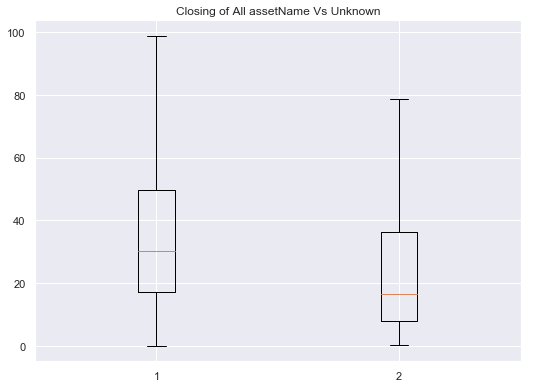

In [171]:
data = [market_data['close'], market_data.close[market_data['assetName']=='Unknown']]
fig, ax = plt.subplots()
ax.boxplot(data, 0, '')
plt.title('Closing of All assetName Vs Unknown')
plt.show()

In [172]:
market_data.groupby('assetCode')['close'].mean().reset_index().sort_values(by='close', ascending=False).head()

,assetCode,close
1460,GOOGL.O,763.556580
1459,GOOG.O,743.822510
2564,PCLN.O,632.970459
747,CME.N,545.510437
1774,ISRG.O,386.257721


In [173]:
market_data.groupby('assetName')['close'].mean().reset_index().sort_values(by='close', ascending=False).head()

,assetName,close
182,Alphabet Inc,753.689575
496,Booking Holdings Inc,632.970459
1702,Intuitive Surgical Inc,386.257721
270,Apple Inc,262.096436
193,Amazon.com Inc,260.670044


In [174]:
freqstocks=market_data.assetName.value_counts()[:1000].index.tolist()
marketfreq=market_data[market_data.assetName.isin(freqstocks)]

In [175]:
marketfreq.groupby('assetName')['close'].std().sort_values(ascending=True)[:5]

assetName
United Microelectronics Corp       0.592034
MFA Financial Inc                  0.873824
ASE Technology Holding Co Ltd      1.212521
Franklin Street Properties Corp    1.324322
Capstead Mortgage Corp             1.448474
Name: close, dtype: float32

In [176]:
data=[]
asset_df = market_data[(market_data['assetName'] == 'United Microelectronics Corp')]

data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df['close'].values,
        name = 'United Microelectronics Corp'
    ))
layout = go.Layout(dict(title = "Closing prices of United Microelectronics Corp",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [177]:
market_data[market_data.assetName==market_data.groupby('assetName')['close'].std().sort_values(ascending=False).idxmin()]

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe
544300,2008-07-15,ESMK.O,RG Steel Wheeling Steel Group LLC,470511.0,19.17,19.18,0.000522,-0.002600,NaN,NaN,0.002615,0.001567,NaN,NaN,-0.017475,False
545833,2008-07-16,ESMK.O,RG Steel Wheeling Steel Group LLC,846691.0,19.17,19.17,0.000000,-0.000521,-0.015489,-0.001104,0.002091,0.002615,NaN,NaN,-0.014007,False
547366,2008-07-17,ESMK.O,RG Steel Wheeling Steel Group LLC,331262.0,19.17,19.25,0.000000,0.004173,-0.007111,0.003901,0.002091,0.006273,NaN,NaN,-0.001602,False
548902,2008-07-18,ESMK.O,RG Steel Wheeling Steel Group LLC,211234.0,19.16,19.17,-0.000522,-0.004156,-0.000695,-0.004133,0.000522,0.000000,NaN,NaN,0.007816,False


In [178]:
for asset in ['Apple Inc','Alphabet Inc','Amazon.com Inc']:
    print(asset)

Apple Inc
Alphabet Inc
Amazon.com Inc


In [179]:
data = []
for i in [0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95]:
    price_df = market_data.groupby('time')['close'].quantile(i).reset_index()

    data.append(go.Scatter(
        x = price_df['time'].values,
        y = price_df['close'].values,
        name = f'{i} quantile'
    ))
layout = go.Layout(dict(title = "Trends of closing prices by quantiles",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"),
    annotations=[
        dict(
            x='2008-09-01',
            y=82,
            xref='x',
            yref='y',
            text='Collapse of Lehman Brothers',
            showarrow=True,
            font=dict(
                family='Courier New, monospace',
                size=16,
                color='#ffffff'
            ),
            align='center',
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='#636363',
            ax=20,
            ay=-30,
            bordercolor='#c7c7c7',
            borderwidth=2,
            borderpad=4,
            bgcolor='#ff7f0e',
            opacity=0.8
        ),
        dict(
            x='2011-08-01',
            y=85,
            xref='x',
            yref='y',
            text='Black Monday',
            showarrow=True,
            font=dict(
                family='Courier New, monospace',
                size=16,
                color='#ffffff'
            ),
            align='center',
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='#636363',
            ax=20,
            ay=-30,
            bordercolor='#c7c7c7',
            borderwidth=2,
            borderpad=4,
            bgcolor='#ff7f0e',
            opacity=0.8
        ),
        dict(
            x='2014-10-01',
            y=120,
            xref='x',
            yref='y',
            text='Brazil crisis',
            showarrow=True,
            font=dict(
                family='Courier New, monospace',
                size=16,
                color='#ffffff'
            ),
            align='center',
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='#636363',
            ax=-20,
            ay=-30,
            bordercolor='#c7c7c7',
            borderwidth=2,
            borderpad=4,
            bgcolor='#ff7f0e',
            opacity=0.8
        ),
        dict(
            x='2016-01-01',
            y=120,
            xref='x',
            yref='y',
            text='Oil prices crash',
            showarrow=True,
            font=dict(
                family='Courier New, monospace',
                size=16,
                color='#ffffff'
            ),
            align='center',
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            arrowcolor='#636363',
            ax=20,
            ay=-30,
            bordercolor='#c7c7c7',
            borderwidth=2,
            borderpad=4,
            bgcolor='#ff7f0e',
            opacity=0.8
        )
    ])
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [180]:
data=[]
for asset in ['Apple Inc','Alphabet Inc','Amazon.com Inc']:
    asset_df = market_data[(market_data['assetName'] == asset)]

    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df['close'].values,
        name = asset
    ))
layout = go.Layout(dict(title = "Closing prices of Apple, Google and Amazon",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')
    

In [14]:
market_data['close_to_open']=abs(market_data['close']-market_data['open'])*100/market_data['open']

In [15]:
market_data['close_to_open']=abs(market_data['close']/market_data['open'])

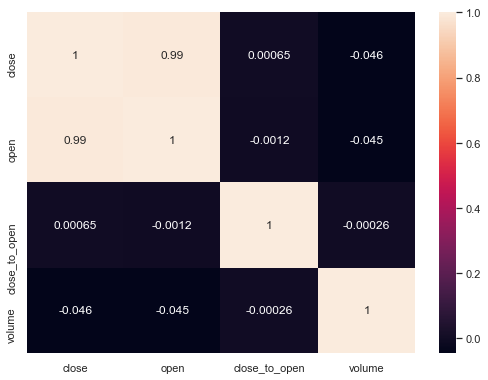

In [16]:
corr = market_data[['close','open','close_to_open','volume']].corr()
sns.set(rc={'figure.figsize':(8.7,6.27)})

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Let's see how the values are corelated to each other

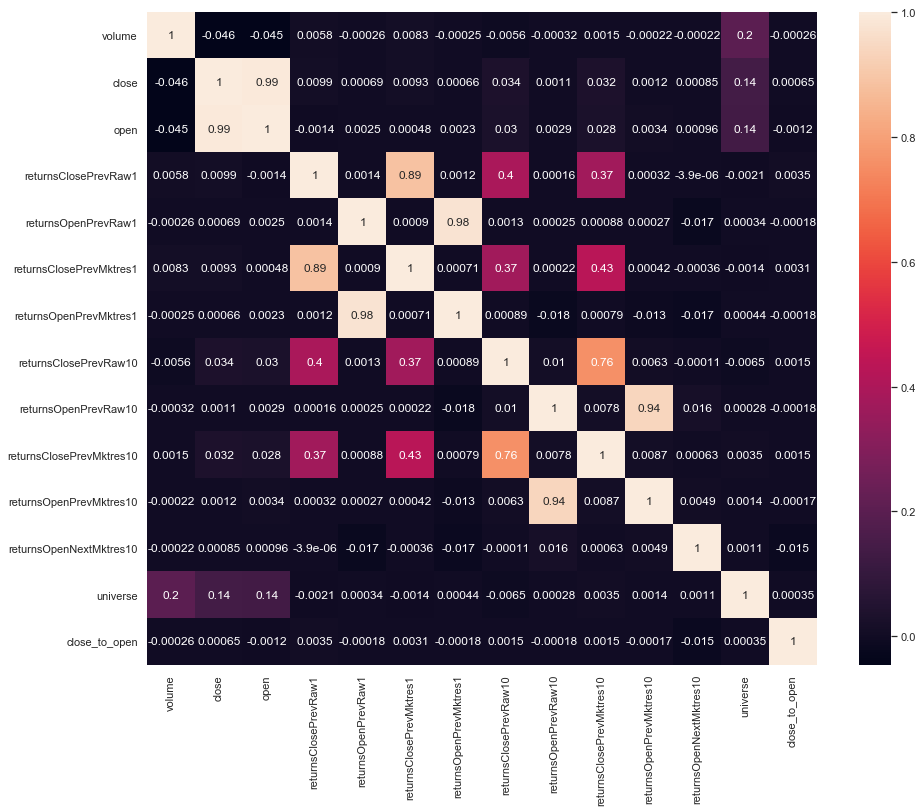

In [19]:
corr = market_data.corr()
sns.set(rc={'figure.figsize':(15,12)})

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Cleaning up market data

Let's take data post 2009 into consideration

In [185]:
market_data[market_data.time>datetime.date(2009, 1, 1)].head(3)

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,close_to_open
732812,2009-01-02,A.N,Agilent Technologies Inc,3030118.0,16.240000,15.600000,0.039028,0.045576,0.029112,0.042122,-0.005511,-0.037037,-0.026992,-0.033293,0.179633,True,1.041026
732813,2009-01-02,AAI.N,AirTran Holdings Inc,1551494.0,4.510000,4.360000,0.015766,-0.035398,-0.018756,-0.047927,0.127500,0.141361,0.110937,0.144485,0.048476,False,1.034404
732814,2009-01-02,AAP.N,Advance Auto Parts Inc,795900.0,34.139999,33.860001,0.014562,0.022652,-0.010692,0.009156,0.035283,0.047398,-0.005260,0.054363,0.029782,True,1.008269


In [186]:
print('We will loose ',4072956-np.shape(market_data[market_data.time>datetime.date(2009, 1, 1)])[0],'rows data','which constitutes to ',732812*100/4072956,'percent')

We will loose  732812 rows data which constitutes to  17.992141334205428 percent


In [187]:
market_data=market_data[market_data.time>datetime.date(2009, 1, 1)]

In [188]:
market_data.shape

(3340144, 17)

In [189]:
market_data.describe()


,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,close_to_open
count,3.340144e+06,3.340144e+06,3.340144e+06,3.340144e+06,3.340144e+06,3.328182e+06,3.328174e+06,3.340144e+06,3.340144e+06,3.275909e+06,3.275865e+06,3.340144e+06,3.340144e+06
mean,2.639898e+06,4.032637e+01,4.031876e+01,7.889647e-04,8.404336e-04,1.649761e-04,3.655074e-04,7.935358e-03,7.992627e-03,1.044463e-03,1.528284e-03,1.158386e-03,1.000401e+00
std,7.816326e+06,4.458819e+01,4.491502e+01,3.692293e-02,1.050432e-01,3.364188e-02,9.419718e-02,8.539551e-02,1.317596e-01,7.415205e-02,1.253186e-01,1.252446e-01,2.940631e-02
min,0.000000e+00,7.000000e-02,8.000000e-02,-9.776464e-01,-9.959986e-01,-1.235622e+00,-7.734479e-01,-9.774034e-01,-8.946596e-01,-3.343277e+00,-2.843179e+00,-1.033950e+01,5.000505e-03
25%,4.584250e+05,1.694000e+01,1.694000e+01,-1.010101e-02,-1.025641e-02,-8.152630e-03,-9.478131e-03,-3.003003e-02,-3.000324e-02,-2.849500e-02,-2.884615e-02,-2.889140e-02,9.908416e-01
50%,9.758150e+05,3.030000e+01,3.029000e+01,5.096840e-04,5.924171e-04,-1.061538e-04,5.683446e-05,6.545763e-03,6.535948e-03,6.156432e-04,8.716749e-04,7.584366e-04,1.000286e+00
75%,2.392364e+06,5.055000e+01,5.053000e+01,1.129944e-02,1.147978e-02,7.998730e-03,9.610343e-03,4.329831e-02,4.323308e-02,2.899303e-02,3.003845e-02,2.973548e-02,1.009753e+00
max,1.226791e+09,1.578130e+03,9.998990e+03,4.559245e+01,1.859884e+02,4.512244e+01,1.636713e+02,4.667181e+01,1.899187e+02,4.624971e+01,1.881849e+02,1.881849e+02,3.382740e+01


In [190]:
market_data['close_to_open']=np.abs(market_data['close']/market_data['open'])

In [191]:
print(f"In {(market_data['close_to_open'] >= 2).sum()} lines price increased by 100% or more.")
print(f"In {(market_data['close_to_open'] <= 0.5).sum()} lines price decreased by 100% or more.")

In 6 lines price increased by 100% or more.
In 3 lines price decreased by 100% or more.


In [192]:
market_data[market_data['close_to_open'] >= 2]

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,close_to_open
1862465,2011-11-02,PGN.N,Paragon Offshore PLC,3444214.0,0.736000,0.090000,7.177778,0.000000,6.980656,-0.006865,7.177778,0.000000,7.363568,0.000322,-0.095988,True,8.177777
3845015,2016-07-06,BBBY.O,Bed Bath & Beyond Inc,50303.0,123.449997,30.680000,1.921202,-0.295522,1.897847,-0.291610,1.849065,-0.303044,1.826249,-0.302549,-0.047101,True,4.023794
3845467,2016-07-06,FLEX.O,Flex Ltd,175451.0,123.449997,16.440001,9.587479,0.405128,9.482847,0.404713,8.503464,0.254962,8.425788,0.255200,0.087592,True,7.509124
3845835,2016-07-06,MAT.O,Mattel Inc,56994.0,123.449997,21.540001,2.904175,-0.315321,2.864919,-0.304480,2.842204,-0.334363,2.812233,-0.334071,-0.069237,True,5.731197
3846276,2016-07-06,SHLD.O,Sears Holdings Corp,80940.0,123.470001,8.840000,8.512326,-0.351431,8.417828,-0.345786,7.781650,-0.370818,7.710716,-0.370630,0.059298,False,13.967195
3846636,2016-07-06,ZNGA.O,Zynga Inc,418847.0,123.470001,3.650000,45.592453,0.403846,45.122437,0.401845,46.671814,0.420233,46.249714,0.420887,-0.045244,False,33.827396


We can observe that there is some data error for BBBY FLEX MAT as three of them has the same closing price on same data which is not possible. Lets delete those 3 rows

In [193]:
market_data.drop([3845015,3845467,3845835], inplace=True)


In [194]:
market_data[market_data['close_to_open'] <= 0.5]

,time,assetCode,assetName,volume,close,open,returnsClosePrevRaw1,returnsOpenPrevRaw1,returnsClosePrevMktres1,returnsOpenPrevMktres1,returnsClosePrevRaw10,returnsOpenPrevRaw10,returnsClosePrevMktres10,returnsOpenPrevMktres10,returnsOpenNextMktres10,universe,close_to_open
1127598,2010-01-04,TW.N,Towers Watson & Co,223136.0,50.00,9998.990234,-0.058470,185.988358,-0.056911,163.671295,-0.024316,189.918701,0.034162,188.184860,13.167586,False,0.005001
1879901,2011-11-16,RMBS.O,Rambus Inc,17227592.0,7.11,17.860001,-0.605876,0.010181,-0.559494,0.006892,-0.595333,0.036564,-0.593534,0.006536,-0.000272,True,0.398096
3264631,2015-03-16,TECD.O,Tech Data Corp,674385.0,56.59,263.799988,0.036447,3.868057,0.020318,3.781770,-0.066172,3.442573,-0.021922,3.284477,0.072616,False,0.214519


In [195]:
data = []
for columnnames in ['close','open']:
    asset_df = market_data[(market_data['assetName'] == 'Towers Watson & Co')]
    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df[columnnames].values,
        name = columnnames
    ))
layout = go.Layout(dict(title = "closing Vs Opening of Towers Watson & Co",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

We can see that the value is totally absurd. Let's delete it.

In [196]:
market_data.drop([1127598], inplace=True)


In [197]:
data = []
for columnnames in ['close','open']:
    asset_df = market_data[(market_data['assetName'] == 'Rambus Inc')]
    data.append(go.Scatter(
        x = asset_df['time'].values,
        y = asset_df[columnnames].values,
        name = columnnames
    ))
layout = go.Layout(dict(title = "closing Vs Opening of Towers Watson & Co",
                  xaxis = dict(title = 'Month'),
                  yaxis = dict(title = 'Price (USD)'),
                  ),legend=dict(
                orientation="h"))
py.iplot(dict(data=data, layout=layout), filename='basic-line')

In [198]:
market_data=market_data.drop(['close_to_open'],axis=1)

In [199]:
return_features = ['returnsClosePrevMktres10','returnsClosePrevRaw10','open','close','volume']

In [200]:
assetname=market_data.assetName.unique()

In [201]:
assetname

[Agilent Technologies Inc, AirTran Holdings Inc, Advance Auto Parts Inc, Apple Inc, AllianceBernstein Holding LP, ..., MTGE Investment Corp, SiteOne Landscape Supply Inc, FCB Financial Holdings Inc, AMC Entertainment Holdings Inc, Calavo Growers Inc]
Length: 3254
Categories (3254, object): [Agilent Technologies Inc, AirTran Holdings Inc, Advance Auto Parts Inc, Apple Inc, ..., SiteOne Landscape Supply Inc, FCB Financial Holdings Inc, AMC Entertainment Holdings Inc, Calavo Growers Inc]

In [202]:
market_data['volume_shift']=market_data.groupby('assetName')['volume'].shift(1)

In [203]:
market_data['volume_change']=market_data.volume_shift/market_data.volume

In [204]:
print(f"In {(market_data['volume_change'] >= 2).sum()} lines price increased by 100% or more.")
print(f"In {(market_data['volume_change'] <= 0.5).sum()} lines price decreased by 100% or more.")

In 203289 lines price increased by 100% or more.
In 228387 lines price decreased by 100% or more.


In [205]:
market_data=market_data.drop(['volume_shift','volume_change'],axis=1)

## Storing the processed data

In [108]:
market_data.to_csv('marketdataprocesssed.csv')